In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
raw_csv_data = pd.read_csv('IPL.csv')


In [3]:
raw_csv_data.columns.values

array(['inning', 'over', 'batsman', 'bowler', 'batsman_run', 'is_wicket',
       'dismissal_kind', 'fielder'], dtype=object)

In [4]:
df = raw_csv_data.copy()
df = df.fillna(0)


In [5]:
df.bowler.unique()
df.bowler.unique()
team1=[ 'Q de Kock', 'KL Rahul', 'E Lewis', 'D Hooda', 'K Pandya', 'M Stoinis', 'J Holder', 'K Gowtham', 'M Khan', 'A Khan', 'R Bishnoi']

team2=['V Kohli', 'F du Plessis', 'R Patidar', 'G Maxwell', 'M Lomror', 'D Karthik', 'S Ahmed', 'W Hasaranga', 'H Patel', 'J Hazlewood', 'S Kaul']

venue='Wankhede Stadium'
# stadiums = ['Dr DY Patil Sports Academy', 'Wankhede Stadium' ,'Maharashtra Cricket Association Stadium', 'Brabourne Stadium']

In [6]:
df=df.fillna(0)

In [7]:
df.dismissal_kind.value_counts()

0                        119924
caught                     3877
bowled                     1054
run out                     448
lbw                         376
stumped                     166
caught and bowled           142
runout                       46
retired hurt                  7
hit wicket                    7
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [8]:


pd.options.display.max_rows=100
        

## ASSUMING TEAM1 IS BATTING AND TEAM 2 IS BOWLING


In [9]:
df1=df[df.batsman.isin(team1)]
df2=df1[df1.bowler.isin((team2))]
df2
batsman_with_no_experience = []
bowler_with_no_experience = []
for x in team1:
    if x not in df2.batsman.unique():
        batsman_with_no_experience.append(x)
for y in team2:
    if y not in df2.bowler.unique():
        bowler_with_no_experience.append(y)
    


In [10]:
#WICKETS

In [11]:

bowlers= df2.bowler.unique()
dream11_bowler_team2=[]
for i in range(bowlers.shape[0]):
    bowler = bowlers[i]
    dismissal_set_with_runout = df2[df2.bowler==bowler]
    dismissal_set_without_runout = dismissal_set_with_runout[dismissal_set_with_runout.dismissal_kind != 'run out']
    no_of_wickets = np.sum(dismissal_set_without_runout[dismissal_set_without_runout.bowler==bowler].is_wicket)
    no_of_delivery = df2[df2.bowler==bowler].shape[0]
    
    
    ratio = float(no_of_delivery/no_of_wickets)
    to=no_of_delivery/6.0
    
    dream11_bowler_team2.append([bowler,ratio,to])

dream11_bowler_team2_df = pd.DataFrame(dream11_bowler_team2,columns=['Bowler','Average','Total overs'])


    
    
    
    
    
    
    



    
    
    
    
    
    
    



C:\Users\91701\AppData\Local\Temp\ipykernel_16944\3134006627.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio = float(no_of_delivery/no_of_wickets)


In [12]:
##Runs

In [13]:
runs_df = df2[df2.batsman_run.isin([1,2,3,5,4,6])]
batsman_array=runs_df.batsman.unique()
dream11_batsman_team1=[]
for i in range(batsman_array.shape[0]):
    batsman = batsman_array[i]
    no_of_delivery_played = df2[df2.batsman==batsman].shape[0]
    
    no_of_dismissal=np.sum(df2[df2.batsman==batsman].is_wicket)
    no_of_dismissal=float(no_of_dismissal)
    no_of_delivery_played=float(no_of_delivery_played)
    strike_rate=(np.sum(df2[df2.batsman==batsman].batsman_run)/(no_of_delivery_played))*100
    average=(np.sum(df2[df2.batsman==batsman].batsman_run)/(no_of_dismissal))
    score = (np.sum(df2[df2.batsman==batsman].batsman_run))
    
    dream11_batsman_team1.append([batsman,average,strike_rate,score])
    

dream11_batsman_team1_df = pd.DataFrame(dream11_batsman_team1,columns=['Batsman','Average','Strike Rate','Score'])


    
    




## ASSUMING TEAM2 BATTING

In [14]:
df1_2=df[df.batsman.isin(team2)]
df2_2=df1_2[df1_2.bowler.isin((team1))]

for a in team2:
    if a not in df2_2.batsman.unique():
        batsman_with_no_experience.append(a)
for b in team1:
    if b not in df2_2.bowler.unique():
        bowler_with_no_experience.append(b)
    
df2_2.bowler.unique()


array(['K Pandya', 'A Khan', 'J Holder', 'R Bishnoi', 'D Hooda',
       'M Stoinis', 'K Gowtham'], dtype=object)

## WICKETS

In [15]:

bowlers= df2_2.bowler.unique()
dream11_bowler_team1=[]
for i in range(bowlers.shape[0]):
    bowler = bowlers[i]
    no_of_delivery = df2_2[df2_2.bowler==bowler].shape[0]
    dismissal_set_with_runout = df2_2[df2_2.bowler==bowler]
    dismissal_set_without_runout = dismissal_set_with_runout[dismissal_set_with_runout.dismissal_kind != 'run out']
    no_of_wickets = np.sum(dismissal_set_without_runout[dismissal_set_without_runout.bowler==bowler].is_wicket)
    
    ratio = float(no_of_delivery/no_of_wickets)
    to=no_of_delivery/6.0
    
    dream11_bowler_team1.append([bowler,ratio,to])

dream11_bowler_team1_df = pd.DataFrame(dream11_bowler_team1,columns=['Bowler','Average','Total overs'])



    
    
    
    
    
    
    



C:\Users\91701\AppData\Local\Temp\ipykernel_16944\341924514.py:10: RuntimeWarning: divide by zero encountered in longlong_scalars
  ratio = float(no_of_delivery/no_of_wickets)


## BOUNDARY

In [16]:
runs_df = df2_2[df2_2.batsman_run.isin([1,2,3,5,4,6])]
batsman_array=runs_df.batsman.unique()
dream11_batsman_team2=[]
for i in range(batsman_array.shape[0]):
    batsman = batsman_array[i]
    no_of_delivery_played = df2_2[df2_2.batsman==batsman].shape[0]
    
    no_of_dismissal=np.sum(df2_2[df2_2.batsman==batsman].is_wicket)
    no_of_dismissal=float(no_of_dismissal)
    no_of_delivery_played=float(no_of_delivery_played)
    strike_rate=(np.sum(df2_2[df2_2.batsman==batsman].batsman_run)/(no_of_delivery_played))*100
    average=(np.sum(df2_2[df2_2.batsman==batsman].batsman_run)/(no_of_dismissal))
    score = (np.sum(df2_2[df2_2.batsman==batsman].batsman_run))
    
    dream11_batsman_team2.append([batsman,average,strike_rate,score])
    

dream11_batsman_team2_df = pd.DataFrame(dream11_batsman_team2,columns=['Batsman','Average','Strike Rate','Score'])


    
    




C:\Users\91701\AppData\Local\Temp\ipykernel_16944\597244537.py:12: RuntimeWarning: divide by zero encountered in true_divide
  average=(np.sum(df2_2[df2_2.batsman==batsman].batsman_run)/(no_of_dismissal))


## CONCATINATION

In [17]:
batsman = pd.concat([dream11_batsman_team1_df,dream11_batsman_team2_df],axis=0)

bowler = pd.concat([dream11_bowler_team1_df,dream11_bowler_team2_df],axis=0)


## BATSMAN STATS

        Batsman     Average  Strike Rate  Score
0       V Kohli   28.800000    93.506494    144
3      KL Rahul  112.000000   172.307692    112
5  F du Plessis   33.000000   117.857143     99
2     G Maxwell   32.000000   139.130435     96
5     Q de Kock   85.000000   139.344262     85
6       E Lewis   71.000000   173.170732     71
3     D Karthik   17.000000    97.142857     68
0      K Pandya   18.666667   133.333333     56
1     R Patidar         inf   123.529412     21
4       D Hooda   19.000000   146.153846     19
1      J Holder   13.000000   108.333333     13
4       S Ahmed    5.000000    90.909091     10
2     M Stoinis    8.000000   114.285714      8
7     K Gowtham    1.000000    33.333333      1


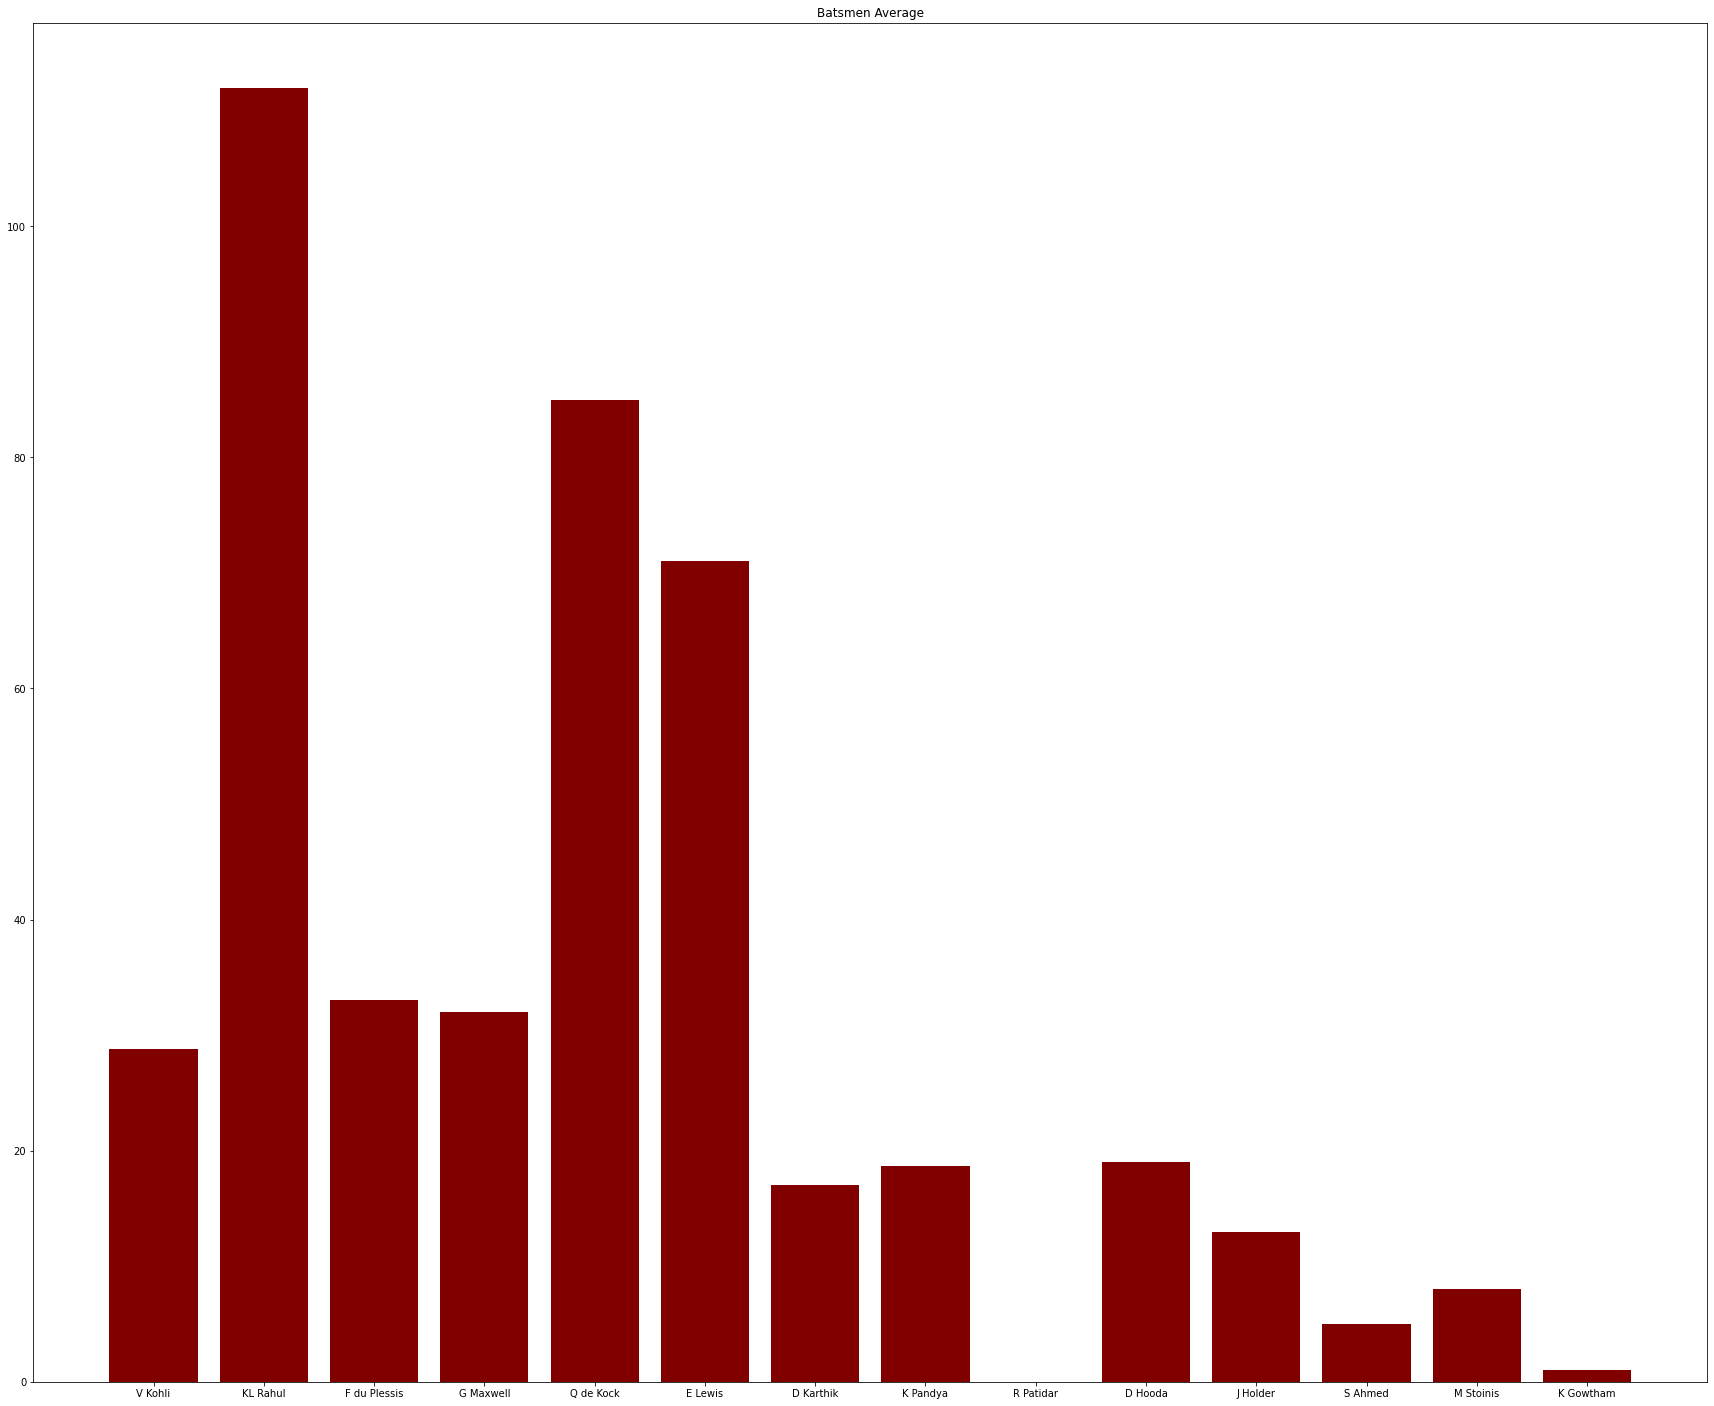

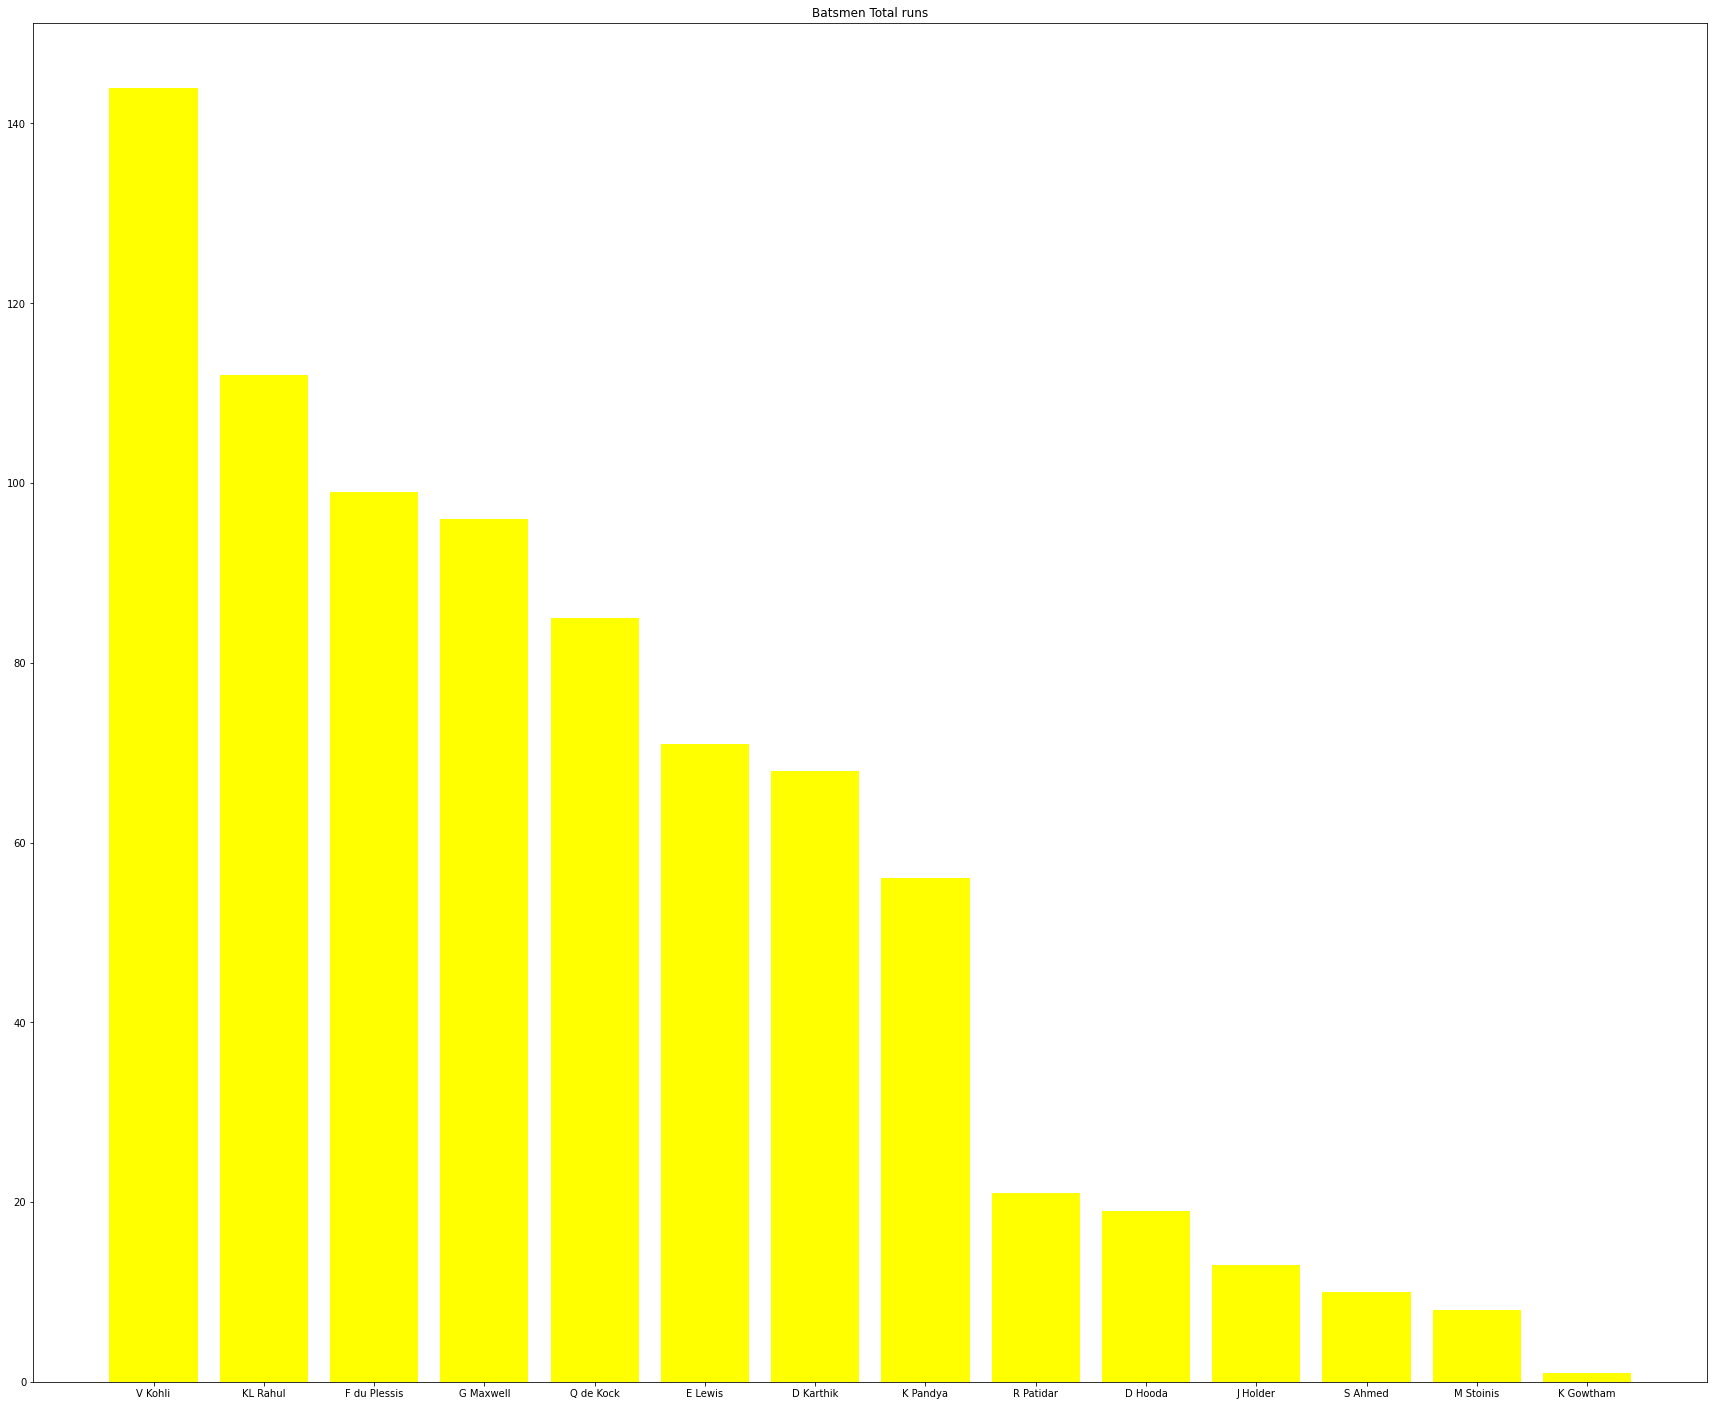

In [18]:
batsman_stats=batsman.sort_values(by='Score',ascending = False)
print((batsman_stats))

df_batsmenwne = pd.DataFrame(batsman_with_no_experience)

plt.figure(figsize=(30,25),facecolor="white") 
plt.title("Batsmen Average")
plt.bar(range(batsman_stats.shape[0]), batsman_stats["Average"], tick_label=batsman_stats.Batsman,color="maroon")
plt.show()
plt.figure(figsize=(30,25),facecolor="white") 
plt.title("Batsmen Total runs")
plt.bar(range(batsman_stats.shape[0]), batsman_stats["Score"], tick_label=batsman_stats.Batsman,color="yellow")
plt.show()





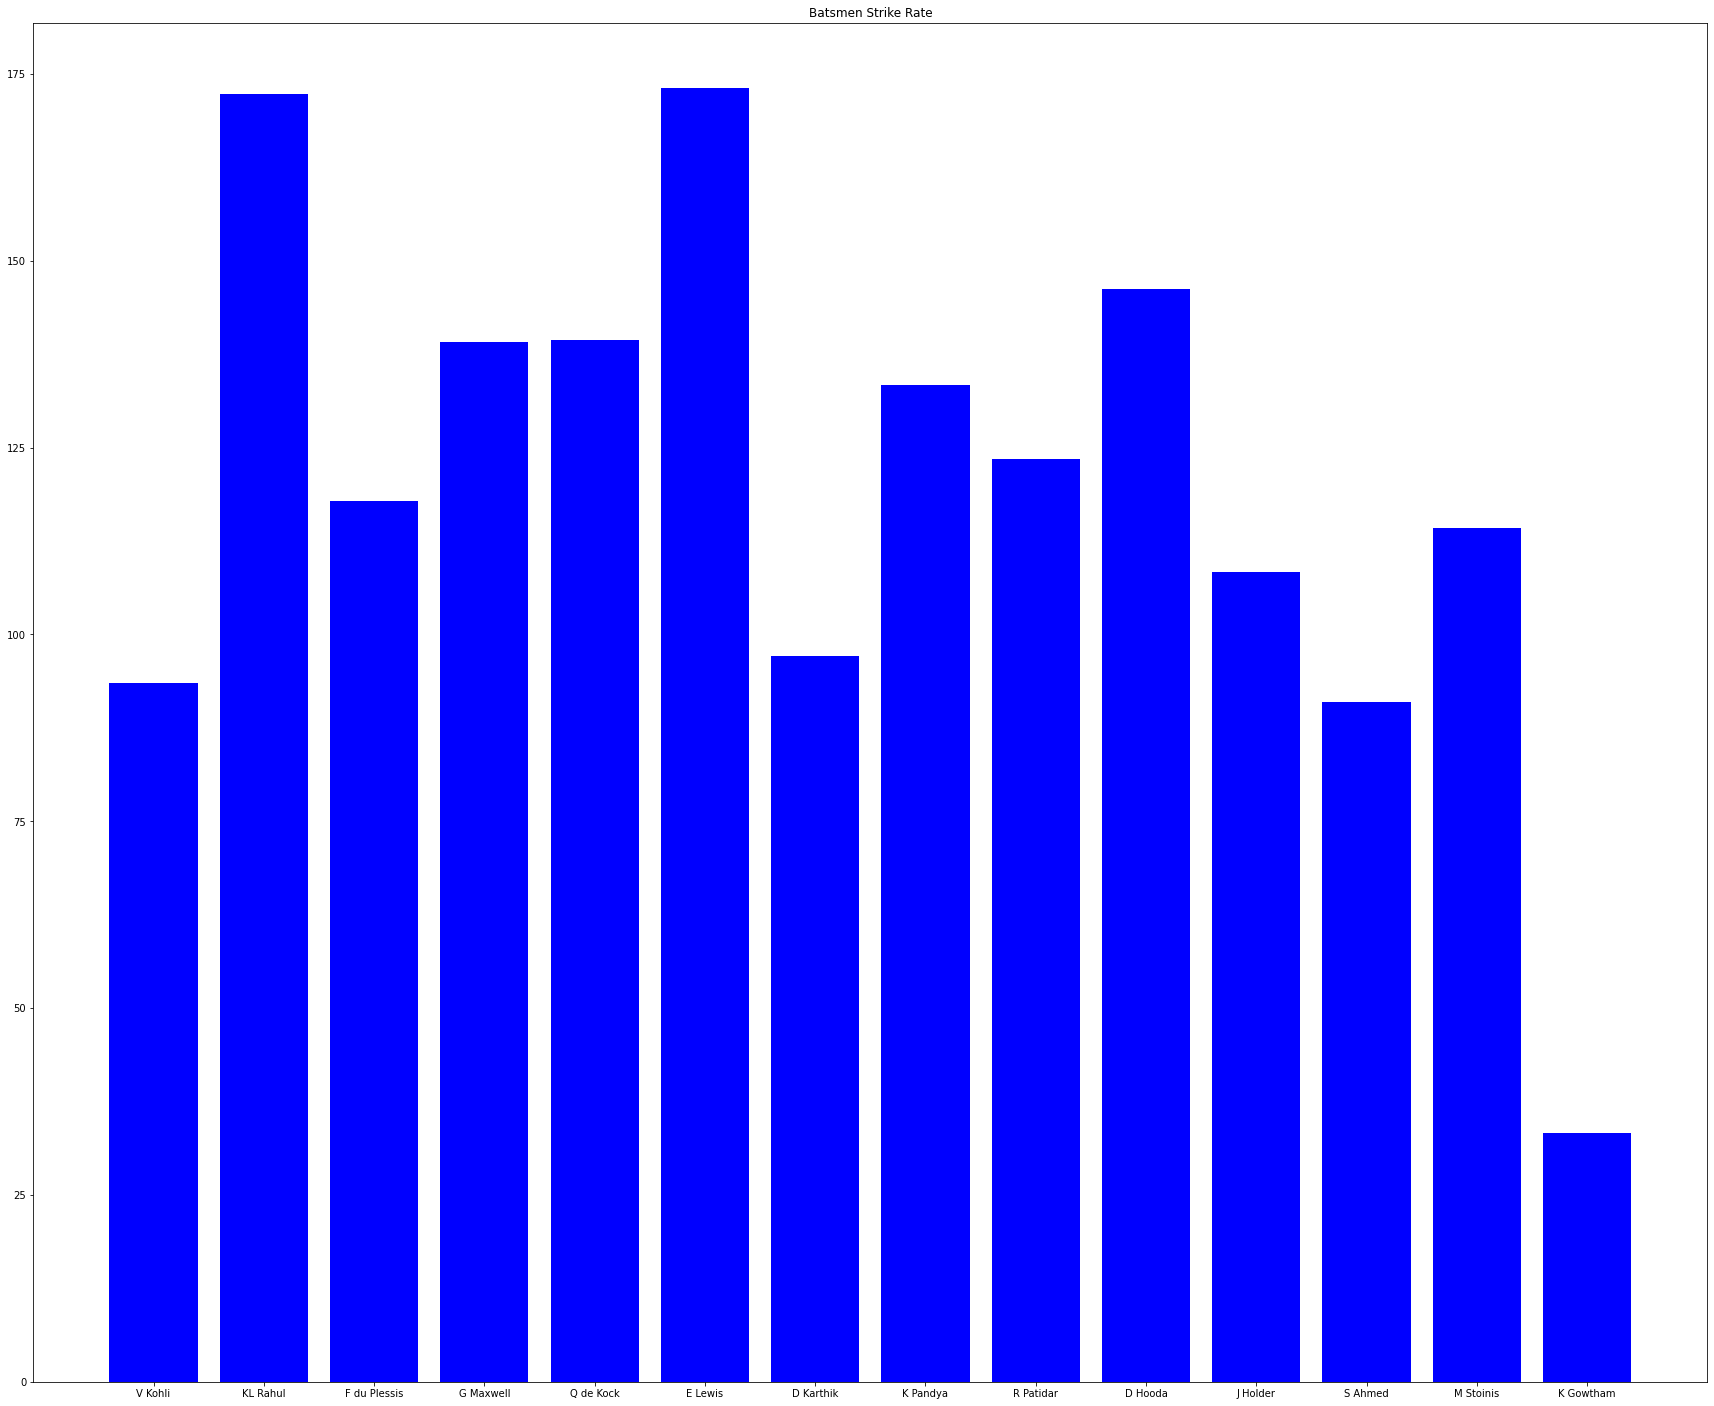

In [19]:
plt.figure(figsize=(30,25),facecolor="white") 
plt.title("Batsmen Strike Rate")
plt.bar(range(batsman_stats.shape[0]), batsman_stats["Strike Rate"], tick_label=batsman_stats.Batsman,color="blue")
plt.show()

Batsmen with no experience:

0         M Khan
1         A Khan
2      R Bishnoi
3       M Lomror
4    W Hasaranga
5    J Hazlewood
6         S Kaul
Name: 0, dtype: object


## BOWLERS STATS

        Bowler    Average  Total overs
1      S Ahmed   9.500000     3.166667
2     J Holder  10.000000     8.333333
4      D Hooda  10.000000     1.666667
4       S Kaul  14.000000     9.333333
1       A Khan  16.333333     8.166667
0      H Patel  28.666667    14.333333
0     K Pandya  32.800000    27.333333
6    K Gowtham  33.000000     5.500000
3    G Maxwell  61.000000    10.166667
3    R Bishnoi  77.000000    12.833333
5    M Stoinis        inf     3.833333
2  J Hazlewood        inf     3.666667


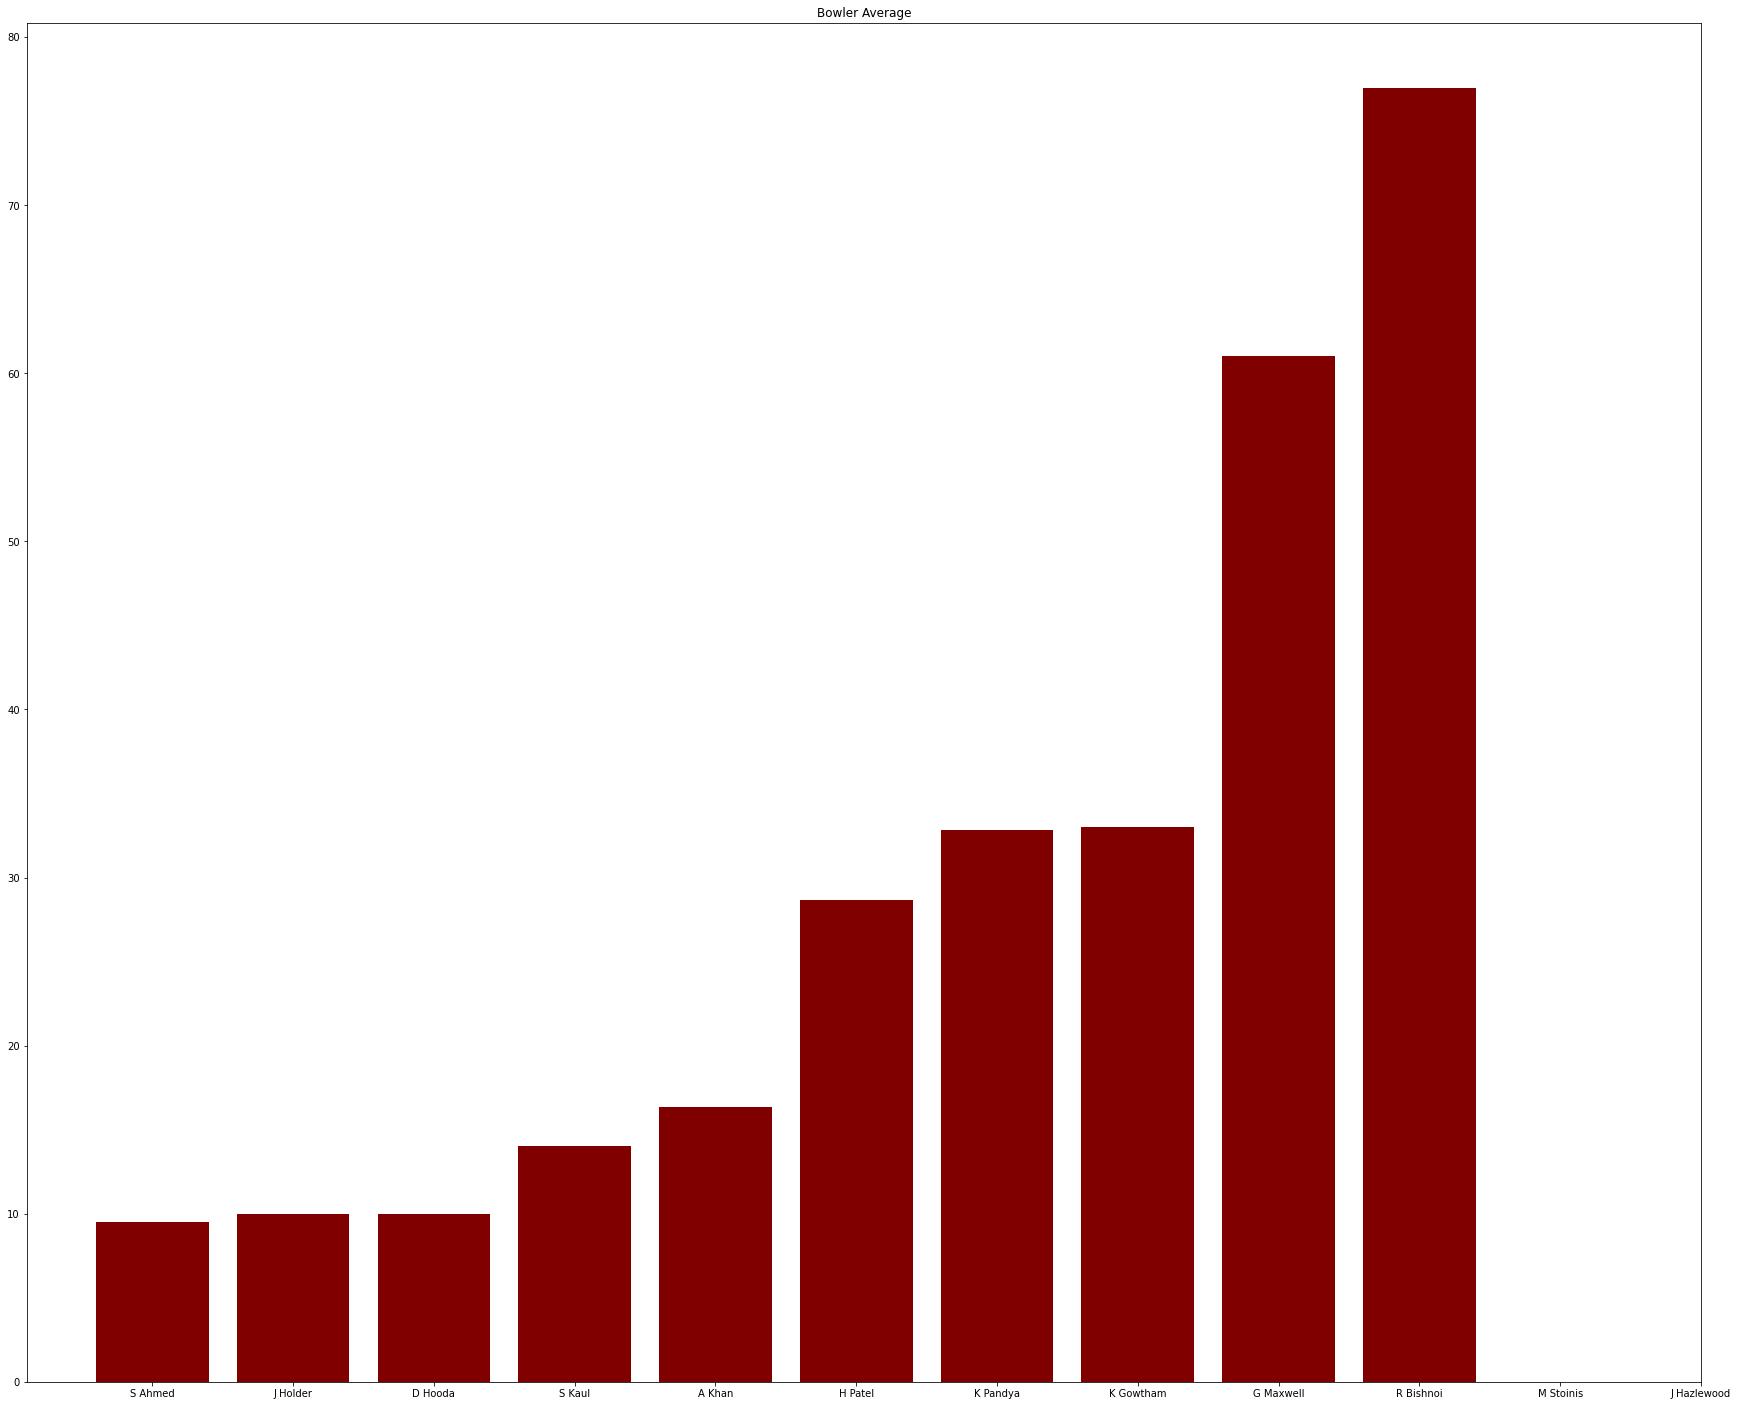

In [23]:
bowler_stats=bowler.sort_values(by='Average')
print(bowler_stats)
import matplotlib.pyplot as plt

df_bowlerswne = pd.DataFrame(bowler_with_no_experience)

plt.figure(figsize=(30,25),facecolor="white") 
plt.title("Bowler Average")
plt.bar(range(bowler_stats.shape[0]), bowler_stats["Average"], tick_label=bowler_stats.Bowler,color="maroon")
plt.show()



Bowlers with no experience:

0         V Kohli
1    F du Plessis
2       R Patidar
3        M Lomror
4       D Karthik
5     W Hasaranga
6       Q de Kock
7        KL Rahul
8         E Lewis
9          M Khan
Name: 0, dtype: object


## Batsman and bowler with no experience against each other

In [26]:
print("Bowlers with no experience:\n")
print(df_bowlerswne[0])

Bowlers with no experience:

0         V Kohli
1    F du Plessis
2       R Patidar
3        M Lomror
4       D Karthik
5     W Hasaranga
6       Q de Kock
7        KL Rahul
8         E Lewis
9          M Khan
Name: 0, dtype: object


In [27]:
print('Batsmen with no experience:\n')
print(df_batsmenwne[0])

Batsmen with no experience:

0         M Khan
1         A Khan
2      R Bishnoi
3       M Lomror
4    W Hasaranga
5    J Hazlewood
6         S Kaul
Name: 0, dtype: object


## Head to Head

# Boundaries by team 2 batsman

In [28]:

pd.options.display.max_rows=None
df2_2[df2_2.batsman_run.isin([4,6])]


,inning,over,batsman,bowler,batsman_run,is_wicket,dismissal_kind,fielder
3349,2,8,G Maxwell,K Pandya,4,0,0,0
3358,2,10,G Maxwell,K Pandya,6,0,0,0
4525,1,19,G Maxwell,J Holder,6,0,0,0
8288,1,3,V Kohli,A Khan,4,0,0,0
8301,1,5,G Maxwell,A Khan,4,0,0,0
9421,2,13,R Patidar,D Hooda,4,0,0,0
9422,2,13,R Patidar,D Hooda,6,0,0,0
12401,1,11,G Maxwell,K Pandya,6,0,0,0
13667,2,4,F du Plessis,J Holder,4,0,0,0
13670,2,4,F du Plessis,J Holder,4,0,0,0


# Important Wickets by team 2 bowlers

In [29]:

pd.options.display.max_rows=None
df2[df2.is_wicket==1]

,inning,over,batsman,bowler,batsman_run,is_wicket,dismissal_kind,fielder
3287,1,19,K Pandya,H Patel,0,1,caught,DT Christian
8468,2,12,M Stoinis,H Patel,0,1,caught,AB de Villiers
9302,1,13,D Hooda,S Ahmed,0,1,caught,R Patidar
12536,2,13,K Pandya,G Maxwell,0,1,bowled,0
14680,2,10,KL Rahul,S Ahmed,0,1,caught,H Patel
15529,1,19,J Holder,H Patel,0,1,caught,DT Christian
83813,1,14,K Gowtham,S Kaul,0,1,caught,W Saha
84333,1,5,E Lewis,S Kaul,0,1,bowled,0
101731,1,8,Q de Kock,S Kaul,0,1,caught,D Hooda
101752,1,11,K Pandya,S Kaul,0,1,caught,J Bairstow


# Boundaries by team 1 batsman

In [30]:
df3 = df2[df2.batsman_run.isin([4,6])]
df3

,inning,over,batsman,bowler,batsman_run,is_wicket,dismissal_kind,fielder
9260,1,7,KL Rahul,H Patel,4,0,0,0
9326,1,17,KL Rahul,H Patel,4,0,0,0
9334,1,19,KL Rahul,H Patel,4,0,0,0
9335,1,19,KL Rahul,H Patel,6,0,0,0
9336,1,19,KL Rahul,H Patel,4,0,0,0
10336,2,1,Q de Kock,J Hazlewood,4,0,0,0
10338,2,1,Q de Kock,J Hazlewood,4,0,0,0
13301,1,2,E Lewis,G Maxwell,4,0,0,0
13311,1,4,E Lewis,H Patel,4,0,0,0
13314,1,4,E Lewis,H Patel,6,0,0,0


# IMPORTANT Wickets by team 1 Bowlers

In [31]:
df2_2[df2_2.dismissal_kind.isin(['bowled','lbw'])]
df2_2[df2_2.is_wicket==1]

,inning,over,batsman,bowler,batsman_run,is_wicket,dismissal_kind,fielder
3429,1,1,F du Plessis,A Khan,0,1,lbw,0
4480,1,12,V Kohli,J Holder,0,1,caught,V Shankar
4529,1,19,G Maxwell,J Holder,0,1,caught,W Saha
8292,1,3,V Kohli,A Khan,0,1,bowled,0
9434,2,15,S Ahmed,R Bishnoi,0,1,caught,H Brar
13261,2,14,D Karthik,A Khan,0,1,bowled,0
13737,2,15,F du Plessis,J Holder,0,1,caught,S Kaul
15643,2,18,S Ahmed,J Holder,0,1,caught,K Williamson
57088,2,11,D Karthik,K Pandya,0,1,caught,Harbhajan Singh
58181,1,10,V Kohli,K Pandya,0,1,caught,T Southee


In [32]:
# df1 = pd.read_csv('IPL Matches 2008-2020.csv')
# df1.venue.unique()
# stadiums = ['Dr DY Patil Sports Academy', 'Wankhede Stadium' ,'Maharashtra Cricket Association Stadium', 'Brabourne Stadium']
# df1=df1[df1.venue.isin(stadiums)]
# df1 = df1.drop([
# 'id','city','date','neutral_venue','team1','team2','toss_winner','toss_decision','winner','result','result_margin','eliminator','method','umpire1','umpire2'],axis=1)

## Man of the match

In [33]:
df1=pd.read_csv('player_of_the_match.csv')


In [34]:
df_motm_team1 = df1[df1.player_of_match.isin(team1)]
df_motm_team1_final = df_motm_team1[df_motm_team1.venue==venue].player_of_match
df_motm_team1_final.value_counts()



Series([], Name: player_of_match, dtype: int64)

In [35]:
df_motm_team2 = df1[df1.player_of_match.isin(team2)]
df_motm_team2_final = df_motm_team2[df_motm_team2.venue==venue].player_of_match
df_motm_team2_final.value_counts()


F du Plessis    1
Name: player_of_match, dtype: int64

## Players most likely to perform

In [52]:
d11=batsman[batsman['Average']>25]
d11=d11[d11['Strike Rate']>125]
d11=d11[d11['Score']>25]
d11_list=[]
d11_=bowler[bowler['Average']<20]
d11_=d11_[d11_['Total overs']>2]
for i in d11.Batsman:
    d11_list.append(i)
for i in d11_.Bowler:
    d11_list.append(i)

In [55]:
## Final list

In [56]:
print("The players most likely to perform are/n")
for i in d11_list:
    print(i)

The players most likely to perform are/n
KL Rahul
Q de Kock
E Lewis
G Maxwell
A Khan
J Holder
S Ahmed
S Kaul
